### Write a model using logistic regression to analyse and predict whether a person will appoint attorny or not

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


In [2]:
#Load the data set
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
claimants.shape

(1340, 7)

In [4]:
len(claimants['CASENUM'].unique())

1283

In [14]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [15]:
#Shape of the data set
claimants.shape

(1340, 6)

In [29]:
# Write code to display NA in every field 

In [16]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [17]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1334,1,1.0,1.0,0.0,16.0,0.060
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [18]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]


In [21]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [22]:
Y = claimants.iloc[:,0]

In [23]:
Y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [26]:
#Logistic regression and fit the model
model= LogisticRegression()
model.fit(X,Y)

# classifier.write_to_pickle('path of file.pkl')
# # classifier.save('Model.hd5')

LogisticRegression()

In [33]:
Y.head(10)

0     0
1     1
2     1
3     0
4     1
5     0
6     0
7     0
8     1
10    0
Name: ATTORNEY, dtype: int64

In [38]:
y_pred[0:9]


array([0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [35]:

y_pred = model.predict(X)

In [36]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': model.predict(X)})

In [37]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [38]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
co_mat = confusion_matrix(Y,y_pred)
#co_mat = confusion_matrix(y_pred,Y)

print (co_mat)

[[381 197]
 [123 395]]


In [40]:
(381+395)/(1096)

0.708029197080292

In [39]:
from matplotlib import pyplot as plt

import seaborn as sns

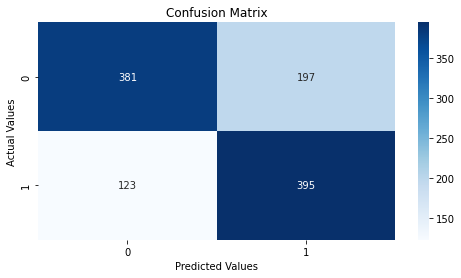

In [40]:
#Visualizing using Confusion Matrix

cm=confusion_matrix(Y,y_pred)
plt.figure(figsize=(8,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [41]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [42]:
model.score(X,Y)

0.708029197080292

In [43]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [46]:
#classifier.predict_proba (X)
model.predict_proba (X)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [ ]:
# ROC Curve


Text(0, 0.5, 'True Positive Rate')

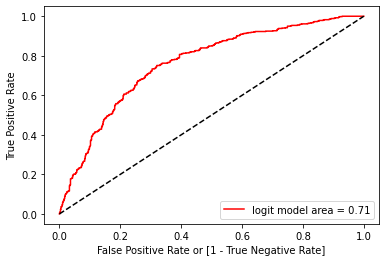

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
#plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot(fpr, tpr, color='red', label='logit model area = %0.2f' % auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
auc